In [122]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

# Data (preparing and loading)

Linear Regression

In [123]:
weight = 0.5
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end ,step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3100],
         [0.3200],
         [0.3300],
         [0.3400],
         [0.3500],
         [0.3600],
         [0.3700],
         [0.3800],
         [0.3900]]))

In [124]:
len(X), len(Y)

(50, 50)

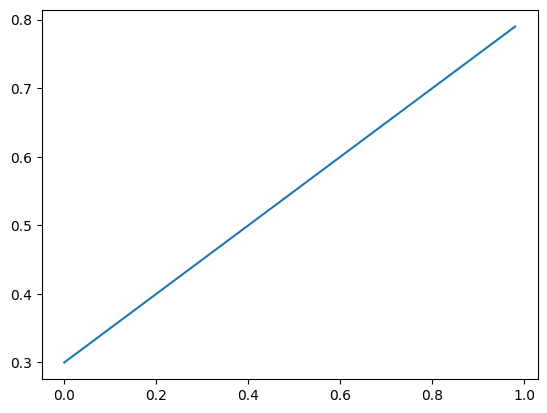

In [125]:
plt.plot(X, Y)
plt.show()

Creat train test split

In [126]:
train_split = int(0.8 * len(X))
X_train , Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

# Using matplotlib

In [127]:
def plot(train_data=X_train,
         train_label=Y_train,
         test_data=X_test,
         test_label=Y_test,
         predictions=None):
  plt.figure(figsize=(5, 5))

  plt.scatter(train_data, train_label, c="b", s=4, label="Training Data")
  plt.scatter(test_data, test_label, c="g", s=4, label="Training Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size":10});

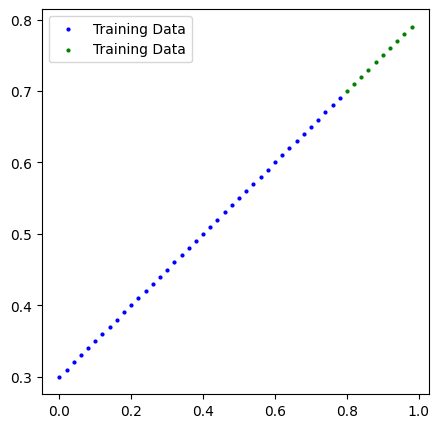

In [128]:
plot();

#Building Model

In [129]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                       requires_grad=True,
                                       dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

### Pytorch model building model building essentials

 So we can check our model parameters or what's inside our model using .parameters()

In [130]:
# create a random seed

torch.manual_seed(42)

#instance of our model

model_0 = LinearRegressionModel()

#checout parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [131]:
#List name parameters

model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [132]:
weight, bias

(0.5, 0.3)

**Making Predictions**

In [133]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.7000],
         [0.7100],
         [0.7200],
         [0.7300],
         [0.7400],
         [0.7500],
         [0.7600],
         [0.7700],
         [0.7800],
         [0.7900]]))

In [134]:
# making predictions using torch.inference_mode
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

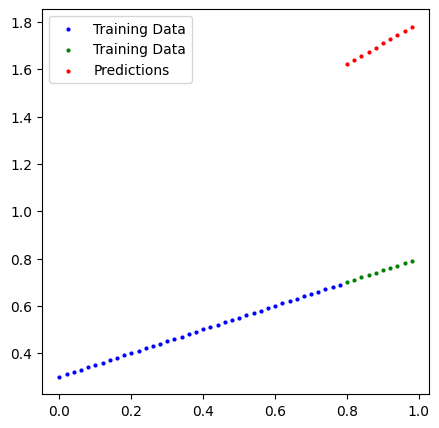

In [135]:
plot(predictions=y_preds)

**LOSS FUNCTIONS**

* Loss function is also called cost function

torch.nn has many in-built loss functions

* Optimiser : takes into account the loss of a model and adjusts the weights and biases to reduce the loss function

In [136]:
# setup a loss function
loss_fn  = nn.L1Loss()

#setup a n optimiser
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01,)

**Training loop**

0. Loop through the data
1. Forward Pass / Propagation
3. Calculate Loss
4. Backward Propagation

In [137]:
torch.manual_seed(42)
epochs = 100 #this is a hyper parameter

###Training
for epoch in range(epochs):
  #set mode to training model
  model_0.train() #train mode in pytorch

  #Forward Pass
  y_preds = model_0(X_train)

  #2.Finding Loss function
  loss = loss_fn(y_preds, Y_train)
if epoch % 10 == 0:
  print(f"Loss: {loss}")

  #3.Optimiser zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()
  #5. Perform Gradient Descent
  optimizer.step()

  # model_0.eval() #turns off gradient tracking

In [138]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [139]:
weight, bias

(0.5, 0.3)

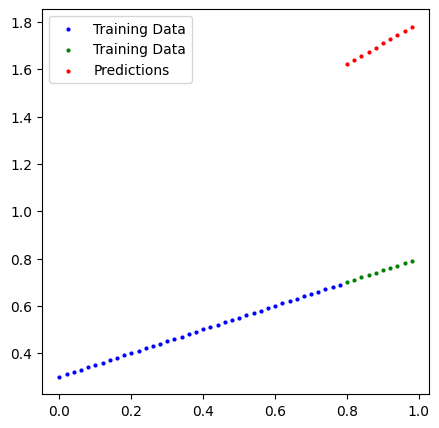

In [140]:
with torch.inference_mode():
    y_preds = model_0(X_test)

plot(predictions=y_preds)

**Testing Code**
* Turning of Features (Dropout of neurons...etc)

In [141]:
##torch.manual_seed(42)
epochs = 1000 #this is a hyper parameter

epoch_count = []
loss_values = []
test_loss_values = []
###Training
for epoch in range(epochs):
  #set mode to training model
  model_0.train() #train mode in pytorch

  #Forward Pass
  y_preds = model_0(X_train)

  #2.Finding Loss function
  loss = loss_fn(y_preds, Y_train)

  #3.Optimiser zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.001,)
  #5. Perform Gradient Descent
  optimizer.step()

  model_0.eval() #turns off gradient tracking/ many features
  with torch.inference_mode(): #truns off gradient tracking
  # with torch.no_grad(): similar to inference_mode but less efficient

  #1.Forward Pass
    test_pred = model_0(X_test)

  #2.Evaluate Loss
  test_loss = loss_fn(test_pred, Y_test)
  if epoch % 100 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} TestLoss: {test_loss}")

Epoch: 0 TestLoss: 0.9538764953613281
Epoch: 100 TestLoss: 0.8191684484481812
Epoch: 200 TestLoss: 0.6844603419303894
Epoch: 300 TestLoss: 0.5497522354125977
Epoch: 400 TestLoss: 0.41504406929016113
Epoch: 500 TestLoss: 0.2803359925746918
Epoch: 600 TestLoss: 0.14562788605690002
Epoch: 700 TestLoss: 0.06256164610385895
Epoch: 800 TestLoss: 0.04541473835706711
Epoch: 900 TestLoss: 0.036385923624038696


In [142]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5605])), ('bias', tensor([0.2746]))])

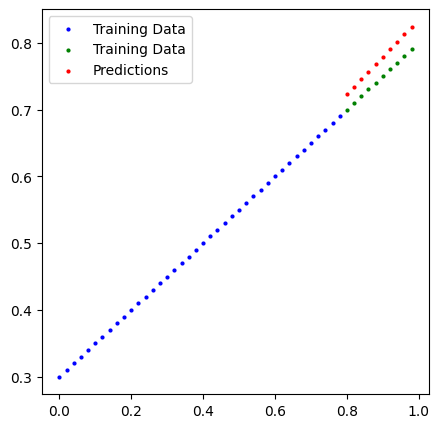

In [143]:
with torch.inference_mode():
    y_preds = model_0(X_test)

plot(predictions=y_preds)

In [144]:
import numpy as np

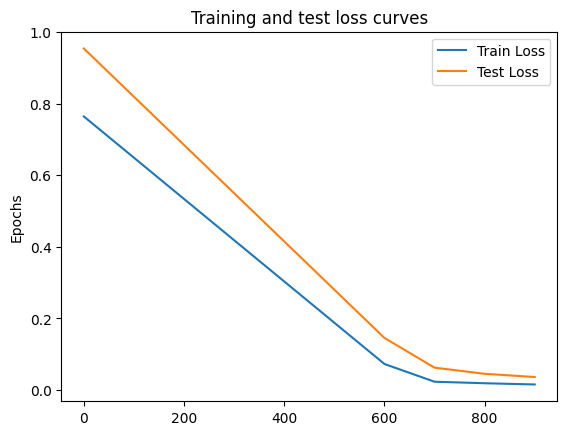

In [145]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.ylabel("Epochs")
plt.legend()

# **Saving Our Model in Pytorch**

1. torch.save() - Allow to save a pytorch objecct in Python's pickel format
2. torch.load()- Allows you to load a saved Pytorch model
3. torch.nn.Module.load_state_dict() - this allows to load a model's saved state dict

#  Pythorch Save and Load Code

In [146]:
#Saving Our PyTorch Model

from pathlib import Path

# 1. create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_Pytorch_Workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3.Save the model state_dict
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [147]:
ls -l models

total 4
-rw-r--r-- 1 root root 1568 May 30 14:36 01_Pytorch_Workflow.pth


# Load the model

Since we saved our models state_dict, we'll create our models instance class and load our saved model

In [148]:
# To load a saved dict we have instance out model class

loaded_model_0 = LinearRegressionModel()

loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [149]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [150]:
loaded_model_0.state_dict(), model_0.state_dict()

(OrderedDict([('weight', tensor([0.5605])), ('bias', tensor([0.2746]))]),
 OrderedDict([('weight', tensor([0.5605])), ('bias', tensor([0.2746]))]))

In [151]:
# make some predictions  from loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.7230],
        [0.7342],
        [0.7454],
        [0.7566],
        [0.7678],
        [0.7790],
        [0.7902],
        [0.8015],
        [0.8127],
        [0.8239]])

In [152]:
y_preds,loaded_model_preds

(tensor([[0.7230],
         [0.7342],
         [0.7454],
         [0.7566],
         [0.7678],
         [0.7790],
         [0.7902],
         [0.8015],
         [0.8127],
         [0.8239]]),
 tensor([[0.7230],
         [0.7342],
         [0.7454],
         [0.7566],
         [0.7678],
         [0.7790],
         [0.7902],
         [0.8015],
         [0.8127],
         [0.8239]]))

In [153]:
#compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting all together

In [154]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch .__version__

'2.6.0+cu124'

In [155]:
#Create device-agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}")

cuda


* 6.1 Data

In [156]:
# create some data using the linearegression equation

In [157]:
weight = 0.7
bias = 0.3

#create range values
start = 0
end = 1
step =0.02

X= torch.arange(start, end, step).unsqueeze(dim=1)
y= weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [158]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

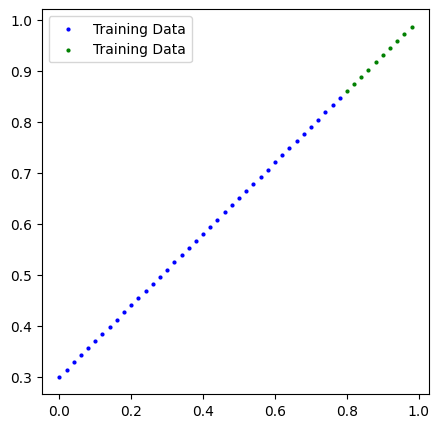

In [159]:
#plot the data

plot(X_train, y_train, X_test, y_test)

In [160]:
## 6.2 Building a linear Model

In [161]:
from torch import nn

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                       requires_grad=True,
                                       dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [162]:
#set manual seed

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(),
 OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))]))

In [163]:
device

'cuda'

In [164]:
next(model_1.parameters()).device

device(type='cpu')

## CHANGING DEVICE TO CUDA

In [165]:
model_1.to(device)

LinearRegressionModelV2()

In [166]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [167]:
model_1.state_dict()

OrderedDict([('weight', tensor([0.8823], device='cuda:0')),
             ('bias', tensor([0.9150], device='cuda:0'))])

# Training Code
* Loss function
* Optimizer
* Training loop
* Testing loop

In [168]:
# Setup a loss function
loss_fn = nn.L1Loss() #Same as MAE

# Setup Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.001)


In [169]:
y_preds.shape, y_train.shape

(torch.Size([10, 1]), torch.Size([40, 1]))

In [186]:
torch.manual_seed(42)
# Put data on the target device(Device agnostic device)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


epochs = 400
for epoch in range(epochs):
  model_1.train()

  # 1. Forward Pass
  y_preds = model_1(X_train)

  # 2. Calculate the Loss
  loss = loss_fn(y_preds, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5.Optimizer step
  optimizer.step()

  ##Testing
  model_1.eval()
  with torch.inference_mode():
    test_preds = model_1(X_test)
    test_loss = loss_fn(test_preds, y_test)

    # 6.Printout Whats Happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss:{loss} | Test Loss:{test_loss}")

Epoch: 0 | Loss:0.22525517642498016 | Test Loss:0.237044095993042
Epoch: 10 | Loss:0.21373434364795685 | Test Loss:0.22357328236103058
Epoch: 20 | Loss:0.20221351087093353 | Test Loss:0.21010246872901917
Epoch: 30 | Loss:0.19069264829158783 | Test Loss:0.19663166999816895
Epoch: 40 | Loss:0.17917180061340332 | Test Loss:0.18316084146499634
Epoch: 50 | Loss:0.16765096783638 | Test Loss:0.1696900576353073
Epoch: 60 | Loss:0.1561301052570343 | Test Loss:0.1562192291021347
Epoch: 70 | Loss:0.1446092575788498 | Test Loss:0.14274843037128448
Epoch: 80 | Loss:0.13308842480182648 | Test Loss:0.12927763164043427
Epoch: 90 | Loss:0.12156756967306137 | Test Loss:0.11580677330493927
Epoch: 100 | Loss:0.11004673689603806 | Test Loss:0.10233600437641144
Epoch: 110 | Loss:0.09852588921785355 | Test Loss:0.08886518329381943
Epoch: 120 | Loss:0.08700504153966904 | Test Loss:0.07539437711238861
Epoch: 130 | Loss:0.07548420876264572 | Test Loss:0.0619235523045063
Epoch: 140 | Loss:0.06396335363388062 | T

In [171]:
model_1.state_dict()

OrderedDict([('weight', tensor([0.7263], device='cuda:0')),
             ('bias', tensor([0.5150], device='cuda:0'))])

In [172]:
weight, bias

(0.7, 0.3)

In [173]:
X_test.to(device)
Y_test.to(device)

tensor([[0.7000],
        [0.7100],
        [0.7200],
        [0.7300],
        [0.7400],
        [0.7500],
        [0.7600],
        [0.7700],
        [0.7800],
        [0.7900]], device='cuda:0')

In [175]:
#truning model into evaluation mode
model_1.eval()
#make predictions on the test data
with torch.inference_mode():
  y_preds =  model_1(X_test)
y_preds

tensor([[1.0960],
        [1.1106],
        [1.1251],
        [1.1396],
        [1.1541],
        [1.1687],
        [1.1832],
        [1.1977],
        [1.2122],
        [1.2268]], device='cuda:0')

In [176]:
X_test.shape,y_test.shape

(torch.Size([10, 1]), torch.Size([10, 1]))

In [187]:
X_test.cpu().numpy()
y_test.cpu().numpy()

array([[0.86 ],
       [0.874],
       [0.888],
       [0.902],
       [0.916],
       [0.93 ],
       [0.944],
       [0.958],
       [0.972],
       [0.986]], dtype=float32)

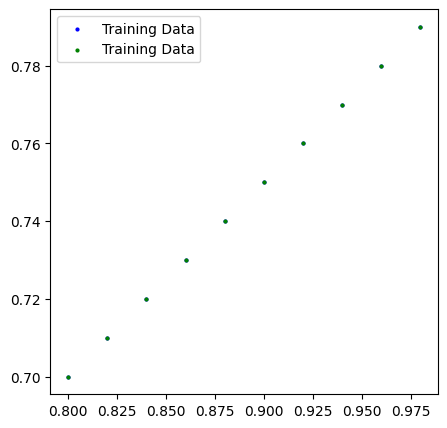

In [188]:
plot(X_test.cpu(), Y_test.cpu())

## Saving and loading a model

In [195]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "first_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"model saved at {MODEL_PATH} ")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

model saved at models 


#Loading a model

In [ ]:
# create a new
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))